# Análisis de datos de los dramas coreanos

In [49]:
import pandas as pd
import missingno as msno
from rich import print

In [50]:
%run "../pandas_extensions/missing.py"

In [51]:
k_dramas: pd.DataFrame = (
    pd.read_csv(
        './../data/csv/korean_drama.csv',
        na_filter=True,
        na_values=[99999, 'Not Yet Rated']
    )
    .drop(columns=['type', 'country'])
)
k_dramas.set_index('kdrama_id', inplace=True)
k_dramas.head()

,drama_name,year,director,screenwriter,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
kdrama_id,,,,,,,,,,,,,,
661d4193916c4e71a2c70473ab11e9e8,Sing My Crush,2023,['So Joon Moon'],NaN,8,1500.0,"Aug 2, 2023","Aug 2, 2023",Wednesday,NaN,NaN,Follow the story of acquaintances Ba Ram and H...,1484.0,2238.0
5ffcbeaa17114714af1959129984274c,D.P. Season 2,2023,NaN,['Kim Bo Tong'],6,3000.0,"Jul 28, 2023","Jul 28, 2023",Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164.0,1084.0
65075cb9c1a54be4a441cee6f16c9fdf,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",8,3300.0,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443.0,6915.0
df0f0ac4b3ff4b15afa26f5a7a53a328,To Be Honest,2023,NaN,NaN,3,600.0,2023-06-30,2023-07-14,Friday,NaN,NaN,Don't you have those days where the whole univ...,49895.0,NaN
04c1fe41948e464fb440001831d74d41,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],12,2700.0,"Jun 30, 2023","Jun 30, 2023",Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826.0,547.0


In [52]:
k_dramas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1752 entries, 661d4193916c4e71a2c70473ab11e9e8 to c19353bdbc7a43ae98b27db202e7c908
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   drama_name    1752 non-null   object 
 1   year          1752 non-null   int64  
 2   director      1036 non-null   object 
 3   screenwriter  959 non-null    object 
 4   tot_eps       1752 non-null   int64  
 5   duration      1728 non-null   float64
 6   start_dt      1752 non-null   object 
 7   end_dt        1752 non-null   object 
 8   aired_on      1520 non-null   object 
 9   org_net       1344 non-null   object 
 10  content_rt    1210 non-null   object 
 11  synopsis      1584 non-null   object 
 12  rank          1677 non-null   float64
 13  pop           1421 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 205.3+ KB


In [53]:
k_dramas.missing_data.columns_without_na

Index(['drama_name', 'year', 'tot_eps', 'start_dt', 'end_dt'], dtype='object')

In [54]:
# content_rt los valores nulos se representan con 'Not Yet Rated'
# rank: los valores nulos se representan con 99999
# pop: los valores nulos se representan con 99999

# type: solo tiene el valor 'Drama'
# country: solo tiene el valor 'South Korea'
# l = k_dramas[k_dramas.missing_data.columns_without_na[5]].unique()
# l.sort()
# l

In [55]:
print(f'k-dramas has {k_dramas.shape[0]} rows and {k_dramas.shape[1]} columns')

k-dramas has 1752 rows and 14 columns

In [56]:
print(f'The columns of k-dramas dataframe are {list(k_dramas.columns)}')

The columns of k-dramas dataframe are ['drama_name', 'year', 'director', 'screenwriter', 'tot_eps', 'duration', 
'start_dt', 'end_dt', 'aired_on', 'org_net', 'content_rt', 'synopsis', 'rank', 'pop']

## Análisis Exploratorio de Datos Faltantes

Se puede ver que la mayoría de columnas no tienen ningún valor faltante.

Pero las dos columnas con mayor número de valores faltantes son: 'director' y 'screenwriter'. La cantidad de valores faltantes en estas dos columnas son similares, así que más adelante se analizarán si tienen algún tipo de relación.

De allí la columna con más valores faltantes es 'org_net', con aproximadamente la mitad de valores faltantes que las dos anteriores.

Luego se encuentra la columna 'aired_on', con nuevamente la mitad de valores faltantes que la anterior.

En el caso de la columnas 'synopsis' pasa algo similar

Y finalmente, la columna con menos valores faltantes es 'duration', con solo 24 valores faltantes. Así que las filas con valores faltantes en esta columna es posible que se puedan eliminar.

### Valores faltantes

In [57]:
k_dramas.missing_data.total_count_na

3289

In [58]:
k_dramas.missing_data.total_count_na_percentage

13.409165035877365

In [59]:
k_dramas.missing_data.total_count_not_na

21239

In [60]:
k_dramas.missing_data.total_count_not_na_percentage

86.59083496412264

-----

### Valores faltantes por columna

In [61]:
k_dramas.missing_data.count_na_per_column

drama_name        0
year              0
director        716
screenwriter    793
tot_eps           0
duration         24
start_dt          0
end_dt            0
aired_on        232
org_net         408
content_rt      542
synopsis        168
rank             75
pop             331
dtype: int64

In [62]:
k_dramas.missing_data.count_na_per_column_percentage

drama_name       0.000000
year             0.000000
director        40.867580
screenwriter    45.262557
tot_eps          0.000000
duration         1.369863
start_dt         0.000000
end_dt           0.000000
aired_on        13.242009
org_net         23.287671
content_rt      30.936073
synopsis         9.589041
rank             4.280822
pop             18.892694
dtype: float64

In [63]:
k_dramas.missing_data.count_na_per_column.sort_values(ascending=False)

screenwriter    793
director        716
content_rt      542
org_net         408
pop             331
aired_on        232
synopsis        168
rank             75
duration         24
drama_name        0
year              0
tot_eps           0
start_dt          0
end_dt            0
dtype: int64

In [64]:
k_dramas.missing_data.count_na_per_column_percentage.sort_values(ascending=False)

screenwriter    45.262557
director        40.867580
content_rt      30.936073
org_net         23.287671
pop             18.892694
aired_on        13.242009
synopsis         9.589041
rank             4.280822
duration         1.369863
drama_name       0.000000
year             0.000000
tot_eps          0.000000
start_dt         0.000000
end_dt           0.000000
dtype: float64

In [65]:
k_dramas.missing_data.na_count_and_percentage_per("column")

,count,percentage
drama_name,0,0.000000
year,0,0.000000
director,716,40.867580
screenwriter,793,45.262557
tot_eps,0,0.000000
duration,24,1.369863
start_dt,0,0.000000
end_dt,0,0.000000
aired_on,232,13.242009
org_net,408,23.287671


In [66]:
k_dramas.missing_data.na_count_and_percentage_per("column").sort_values(by="count", ascending=False)

,count,percentage
screenwriter,793,45.262557
director,716,40.867580
content_rt,542,30.936073
org_net,408,23.287671
pop,331,18.892694
aired_on,232,13.242009
synopsis,168,9.589041
rank,75,4.280822
duration,24,1.369863
drama_name,0,0.000000


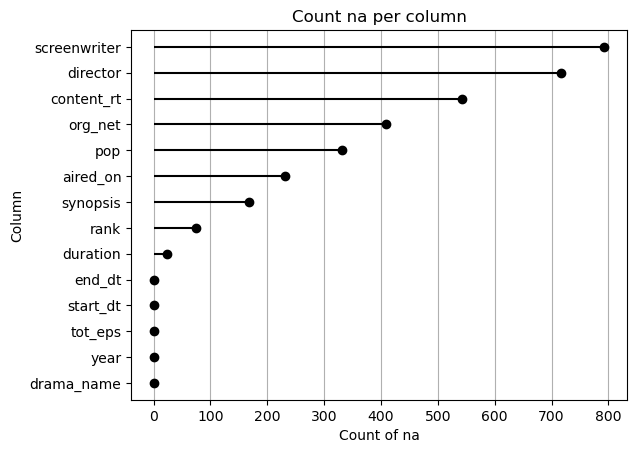

In [67]:
k_dramas.missing_data.plot_of_na_count_per_column()

<Axes: >

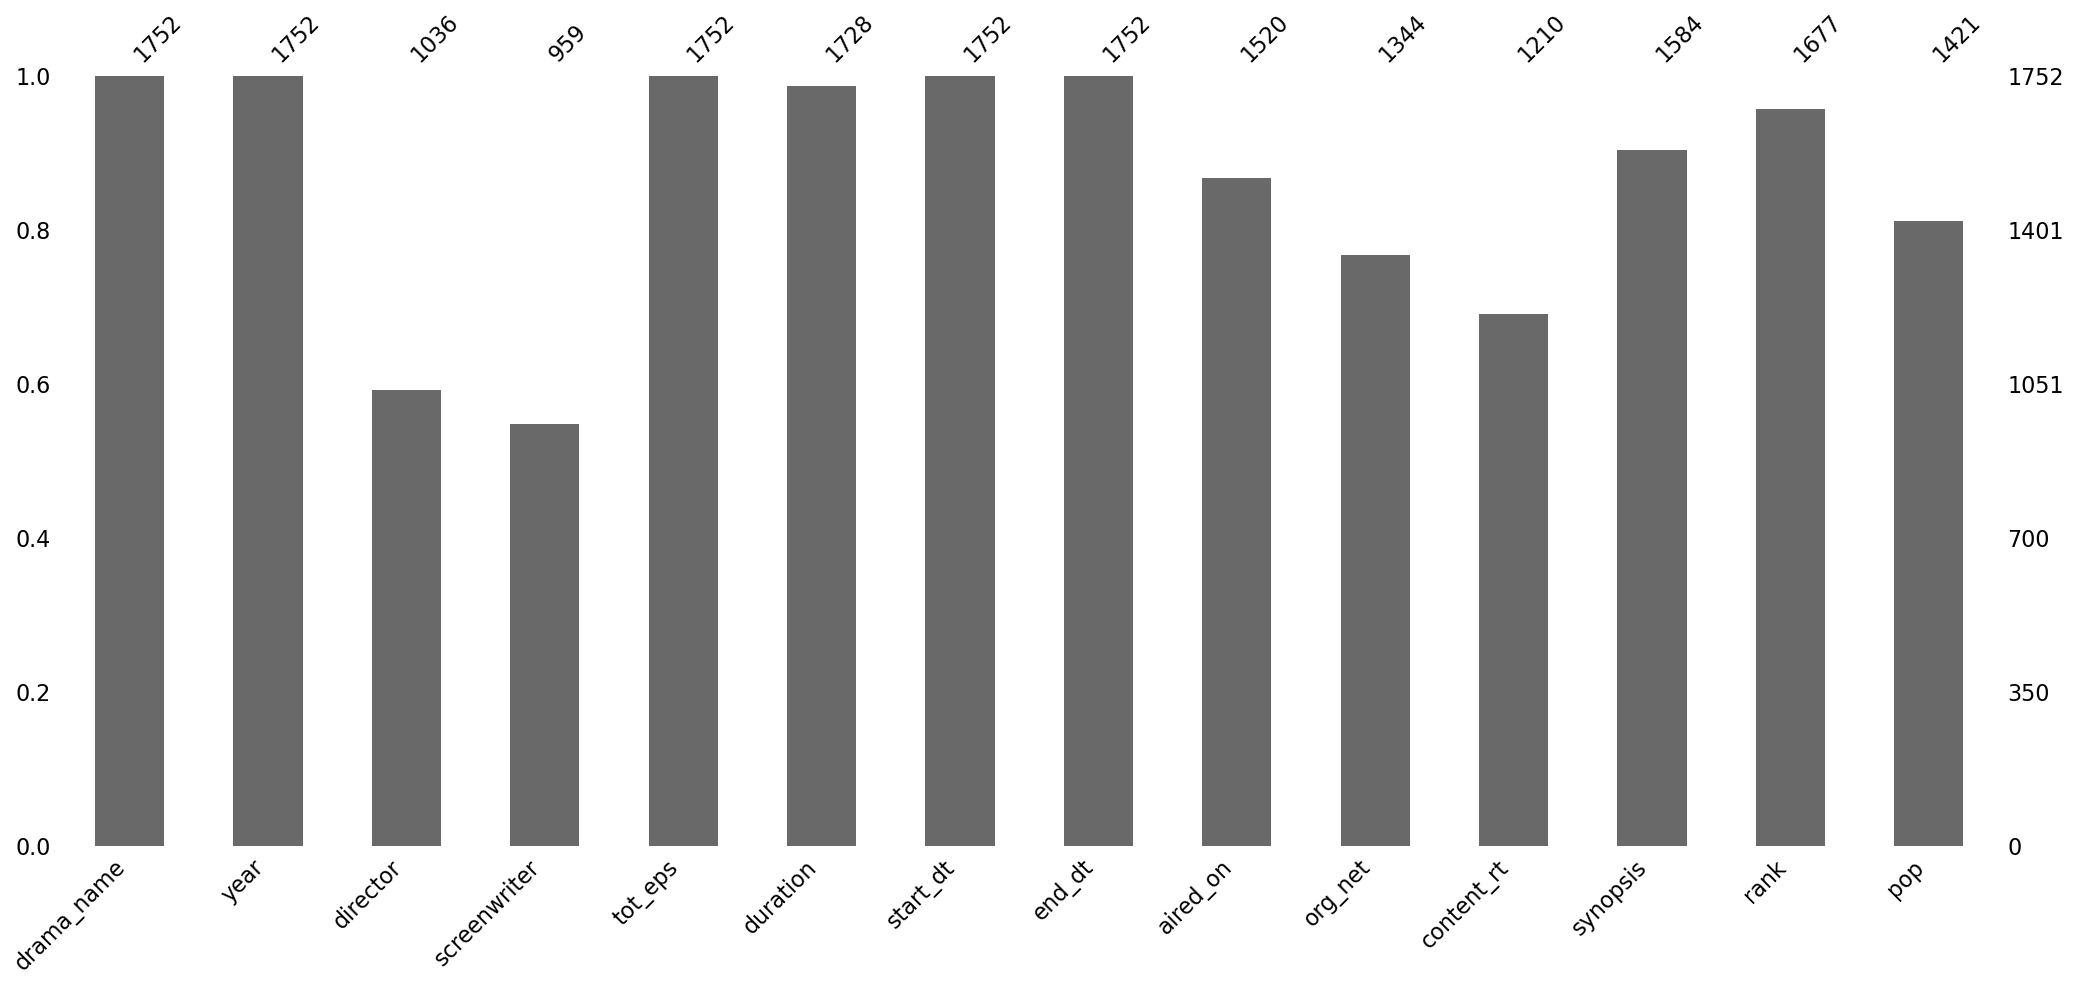

In [68]:
msno.bar(k_dramas)

<Axes: >

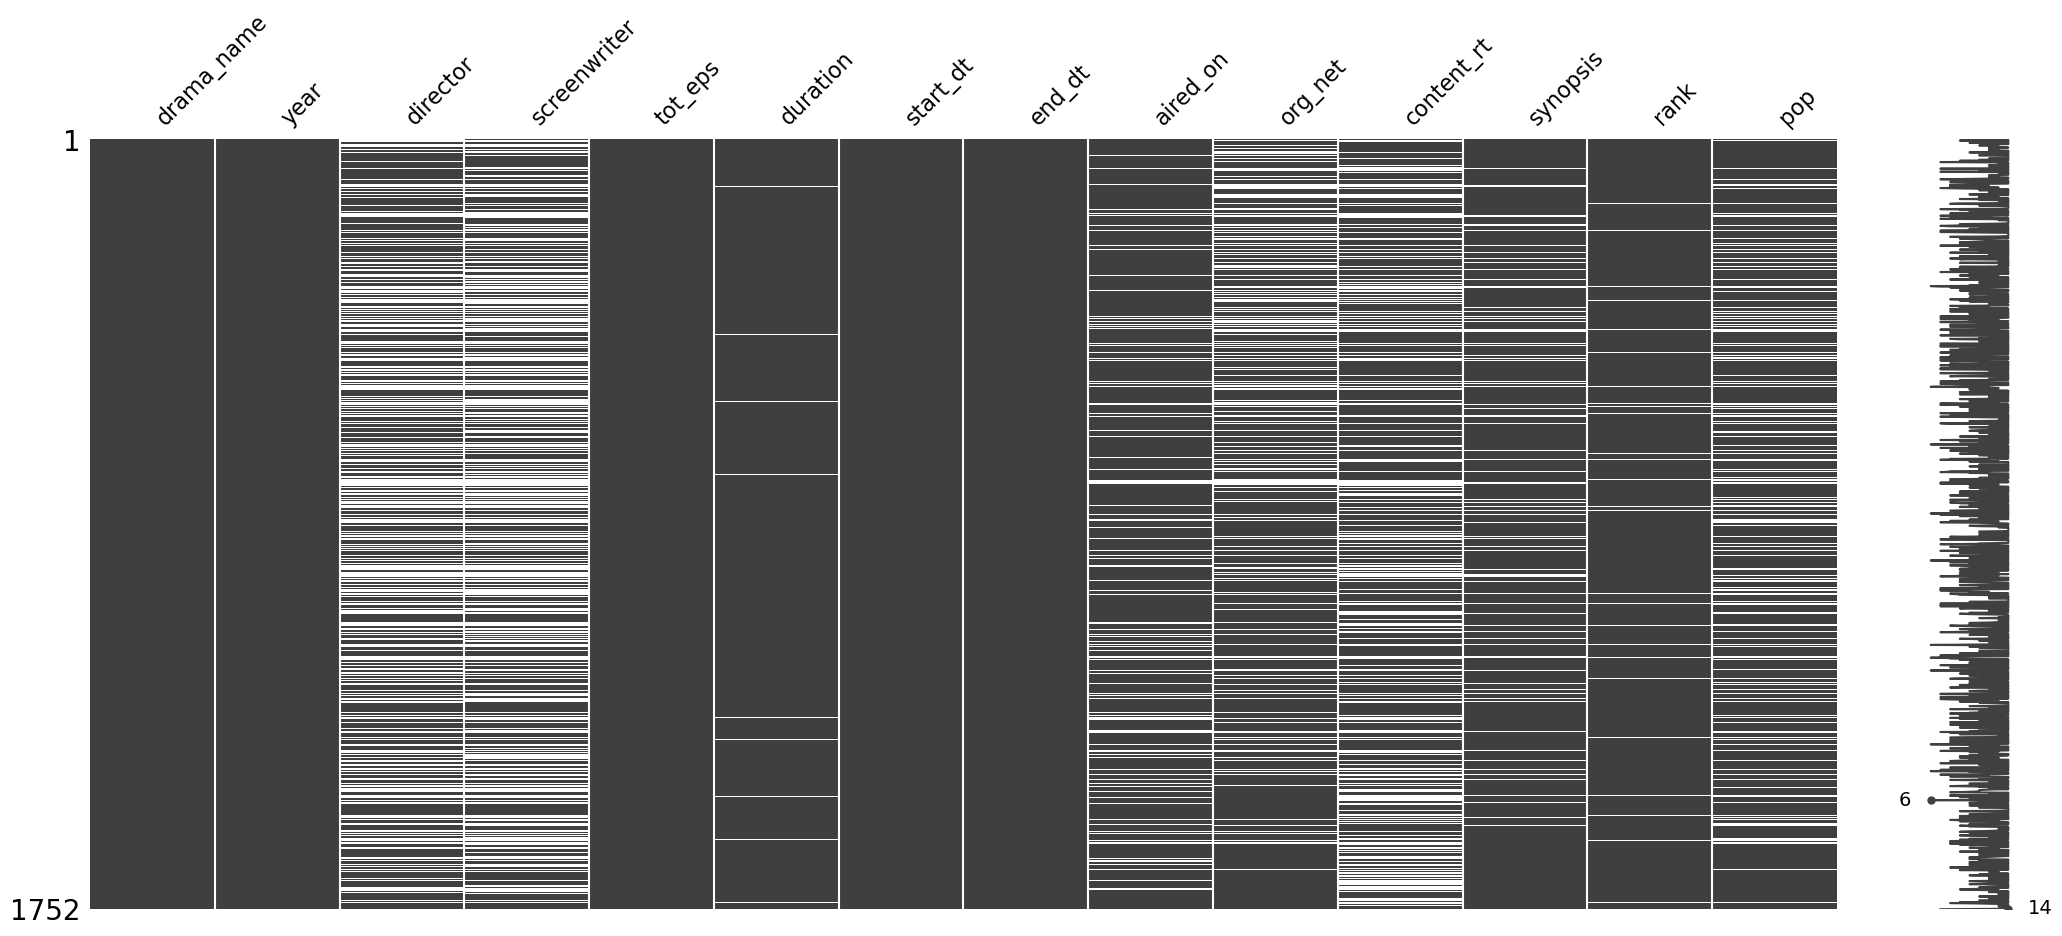

In [69]:
msno.matrix(df=k_dramas)

<Axes: >

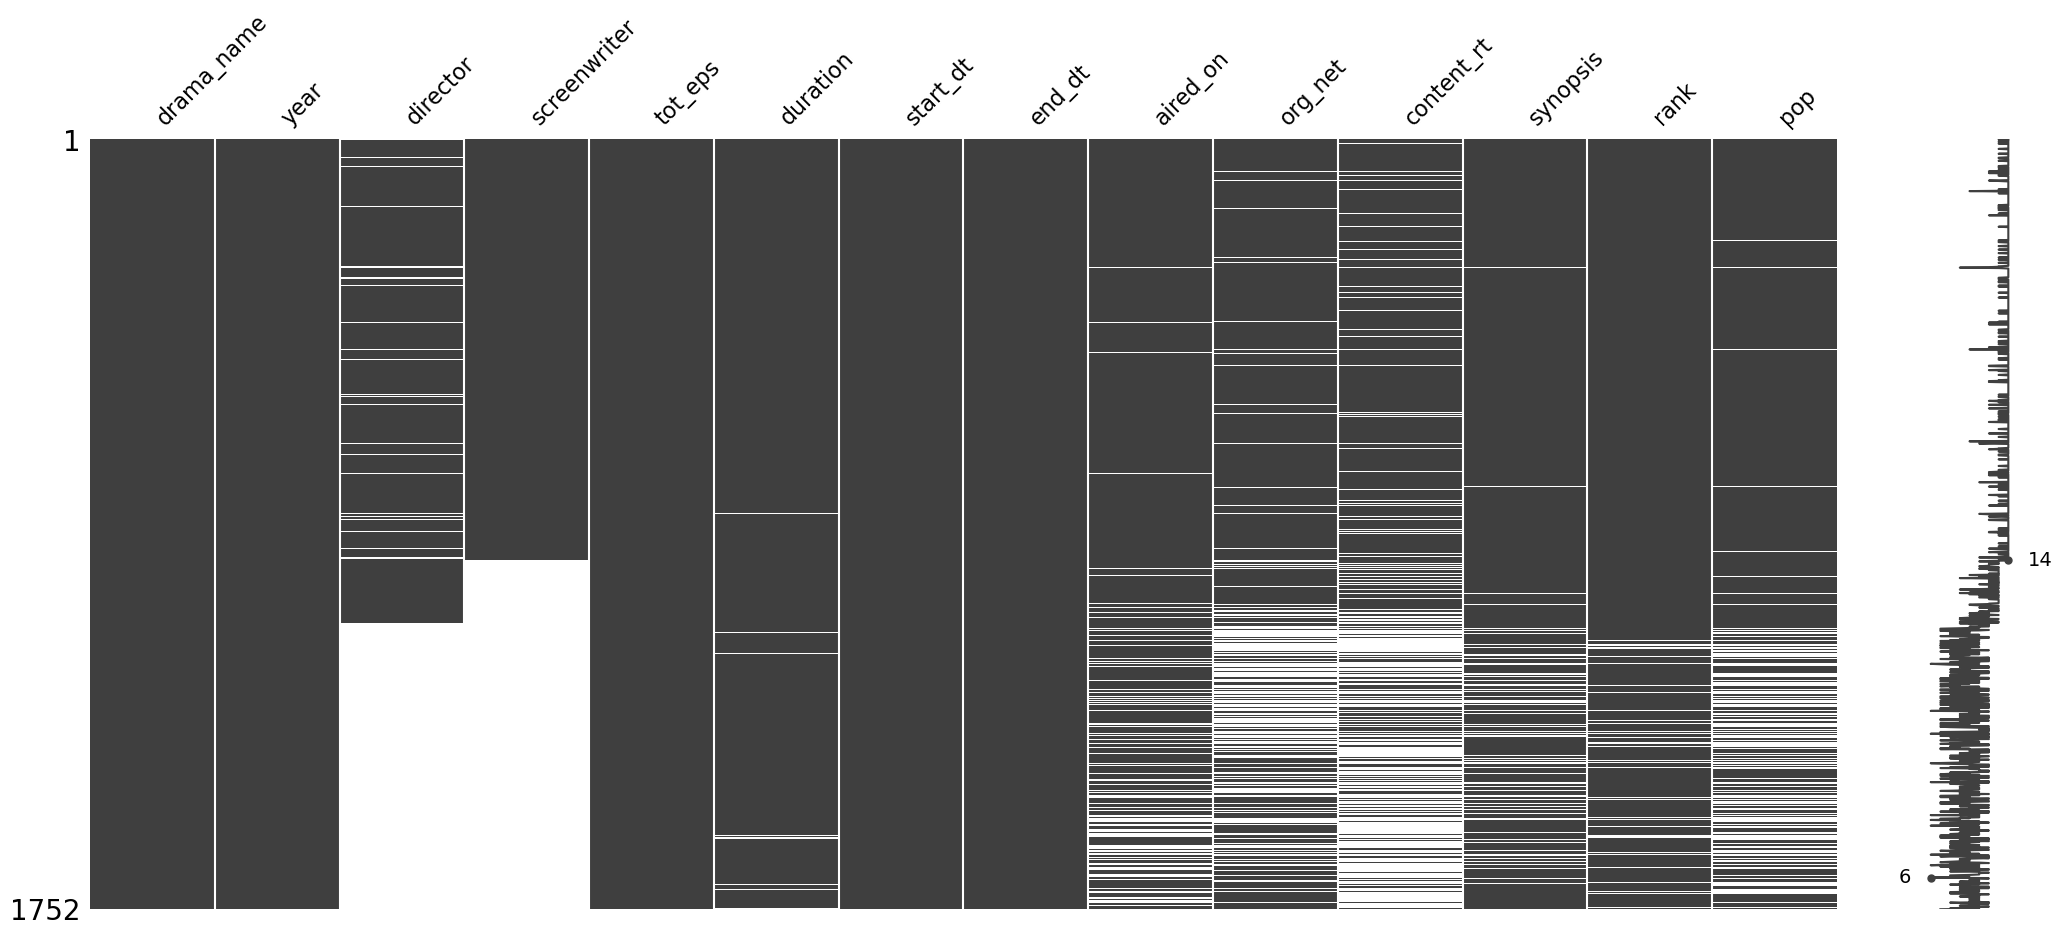

In [70]:
msno.matrix(df=k_dramas.sort_values(by=["screenwriter", "director"], ascending=False))

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: xlabel='Intersection size'>}

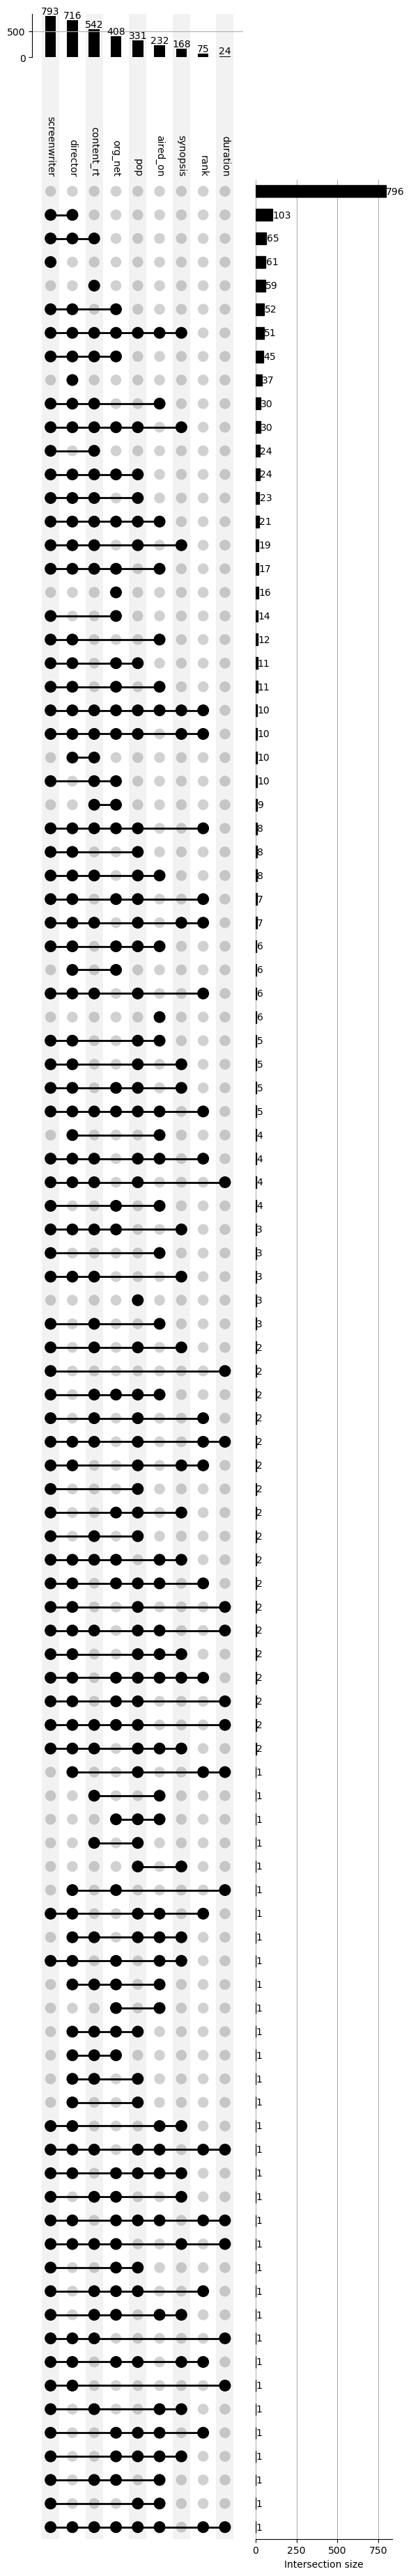

In [71]:
k_dramas.missing_data.upsetplot(
    orientation="vertical",
    sort_by="cardinality",
    show_counts=True,
)

In [72]:
k_dramas.missing_data.coincidence_count_na_per("column")

0      5
24     1
75     1
168    1
232    1
331    1
408    1
542    1
716    1
793    1
Name: count, dtype: int64

In [73]:
k_dramas.missing_data.coincidence_and_percentage_count_na_per("column")

,count,percentage
0,5,35.714286
24,1,7.142857
75,1,7.142857
168,1,7.142857
232,1,7.142857
331,1,7.142857
408,1,7.142857
542,1,7.142857
716,1,7.142857
793,1,7.142857


In [74]:
k_dramas.missing_data.columns_with_na

Index(['director', 'screenwriter', 'duration', 'aired_on', 'org_net',
       'content_rt', 'synopsis', 'rank', 'pop'],
      dtype='object')

In [75]:
k_dramas.missing_data.columns_without_na

Index(['drama_name', 'year', 'tot_eps', 'start_dt', 'end_dt'], dtype='object')

-----------

### Valores faltantes por fila

In [76]:
k_dramas.missing_data.count_na_per_row

kdrama_id
661d4193916c4e71a2c70473ab11e9e8    3
5ffcbeaa17114714af1959129984274c    1
65075cb9c1a54be4a441cee6f16c9fdf    0
df0f0ac4b3ff4b15afa26f5a7a53a328    5
04c1fe41948e464fb440001831d74d41    0
                                   ..
e8c09f0f7d0d4b75a4642eb06d76d811    0
1e7f7f2fa45d4240b8bb585ca13040f0    0
142a09741fdd4daa878d6ae007201e43    0
9170c31a02014b56bb4cec2105086f00    0
c19353bdbc7a43ae98b27db202e7c908    7
Length: 1752, dtype: int64

In [77]:
k_dramas.missing_data.count_na_per_row_percentage

kdrama_id
661d4193916c4e71a2c70473ab11e9e8    21.428571
5ffcbeaa17114714af1959129984274c     7.142857
65075cb9c1a54be4a441cee6f16c9fdf     0.000000
df0f0ac4b3ff4b15afa26f5a7a53a328    35.714286
04c1fe41948e464fb440001831d74d41     0.000000
                                      ...    
e8c09f0f7d0d4b75a4642eb06d76d811     0.000000
1e7f7f2fa45d4240b8bb585ca13040f0     0.000000
142a09741fdd4daa878d6ae007201e43     0.000000
9170c31a02014b56bb4cec2105086f00     0.000000
c19353bdbc7a43ae98b27db202e7c908    50.000000
Length: 1752, dtype: float64

In [78]:
k_dramas.missing_data.count_na_per_row.sort_values(ascending=False)

kdrama_id
ba3fc8e726bd4c98af92151107122070    8
2027a2b550334f7da7f1e986042aa28b    8
abbaf76466d44e678fd71036dc5230ca    8
6435f42a442f44f7b54352450dedd4a0    8
d93bb607bda64f3ca4470c3f2d4c8150    8
                                   ..
c441061e809a46e1935f500435e08144    0
dd5206730b30434e81c4a442385cd436    0
43c0af2cd1cd4781ac14c70700d539dd    0
4b66bb4d1a604912805c9f16b6be353c    0
45edc1b35b37412b90bcd5afff792b85    0
Length: 1752, dtype: int64

In [79]:
k_dramas.missing_data.count_na_per_row_percentage.sort_values(ascending=False)

kdrama_id
ba3fc8e726bd4c98af92151107122070    57.142857
2027a2b550334f7da7f1e986042aa28b    57.142857
abbaf76466d44e678fd71036dc5230ca    57.142857
6435f42a442f44f7b54352450dedd4a0    57.142857
d93bb607bda64f3ca4470c3f2d4c8150    57.142857
                                      ...    
c441061e809a46e1935f500435e08144     0.000000
dd5206730b30434e81c4a442385cd436     0.000000
43c0af2cd1cd4781ac14c70700d539dd     0.000000
4b66bb4d1a604912805c9f16b6be353c     0.000000
45edc1b35b37412b90bcd5afff792b85     0.000000
Length: 1752, dtype: float64

In [80]:
k_dramas.missing_data.na_count_and_percentage_per("row")

,count,percentage
kdrama_id,,
661d4193916c4e71a2c70473ab11e9e8,3,21.428571
5ffcbeaa17114714af1959129984274c,1,7.142857
65075cb9c1a54be4a441cee6f16c9fdf,0,0.000000
df0f0ac4b3ff4b15afa26f5a7a53a328,5,35.714286
04c1fe41948e464fb440001831d74d41,0,0.000000
...,...,...
e8c09f0f7d0d4b75a4642eb06d76d811,0,0.000000
1e7f7f2fa45d4240b8bb585ca13040f0,0,0.000000
142a09741fdd4daa878d6ae007201e43,0,0.000000


In [81]:
k_dramas.missing_data.na_count_and_percentage_per("row").sort_values(by="count", ascending=False)

,count,percentage
kdrama_id,,
ba3fc8e726bd4c98af92151107122070,8,57.142857
2027a2b550334f7da7f1e986042aa28b,8,57.142857
abbaf76466d44e678fd71036dc5230ca,8,57.142857
6435f42a442f44f7b54352450dedd4a0,8,57.142857
d93bb607bda64f3ca4470c3f2d4c8150,8,57.142857
...,...,...
c441061e809a46e1935f500435e08144,0,0.000000
dd5206730b30434e81c4a442385cd436,0,0.000000
43c0af2cd1cd4781ac14c70700d539dd,0,0.000000


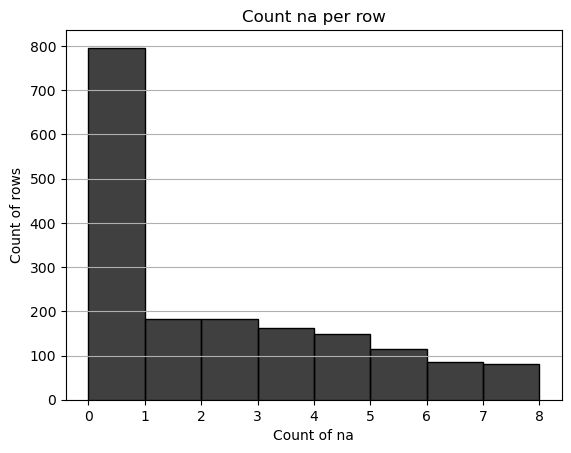

In [82]:
k_dramas.missing_data.histplot_of_na_count_per_row()

In [83]:
k_dramas.missing_data.coincidence_count_na_per("row")

0    796
1    182
2    182
3    163
4    149
5    114
6     85
7     70
8     11
Name: count, dtype: int64

In [84]:
k_dramas.missing_data.coincidence_and_percentage_count_na_per("row")

,count,percentage
0,796,45.433790
1,182,10.388128
2,182,10.388128
3,163,9.303653
4,149,8.504566
5,114,6.506849
6,85,4.851598
7,70,3.995434
8,11,0.627854


------

### Valores faltantes por intervalos

In [85]:
column = k_dramas.missing_data.columns_with_na[1]
column

'screenwriter'

In [86]:
interval = 10

In [87]:
k_dramas.missing_data.na_count_by_intervals(interval, column)

,count_of_na,count_of_not_na,percentage_of_na,percentage_of_not_na
groupby_number,,,,
0,4,6,40.0,60.0
1,6,4,60.0,40.0
2,3,7,30.0,70.0
3,3,7,30.0,70.0
4,2,8,20.0,80.0
...,...,...,...,...
171,3,7,30.0,70.0
172,2,8,20.0,80.0
173,4,6,40.0,60.0


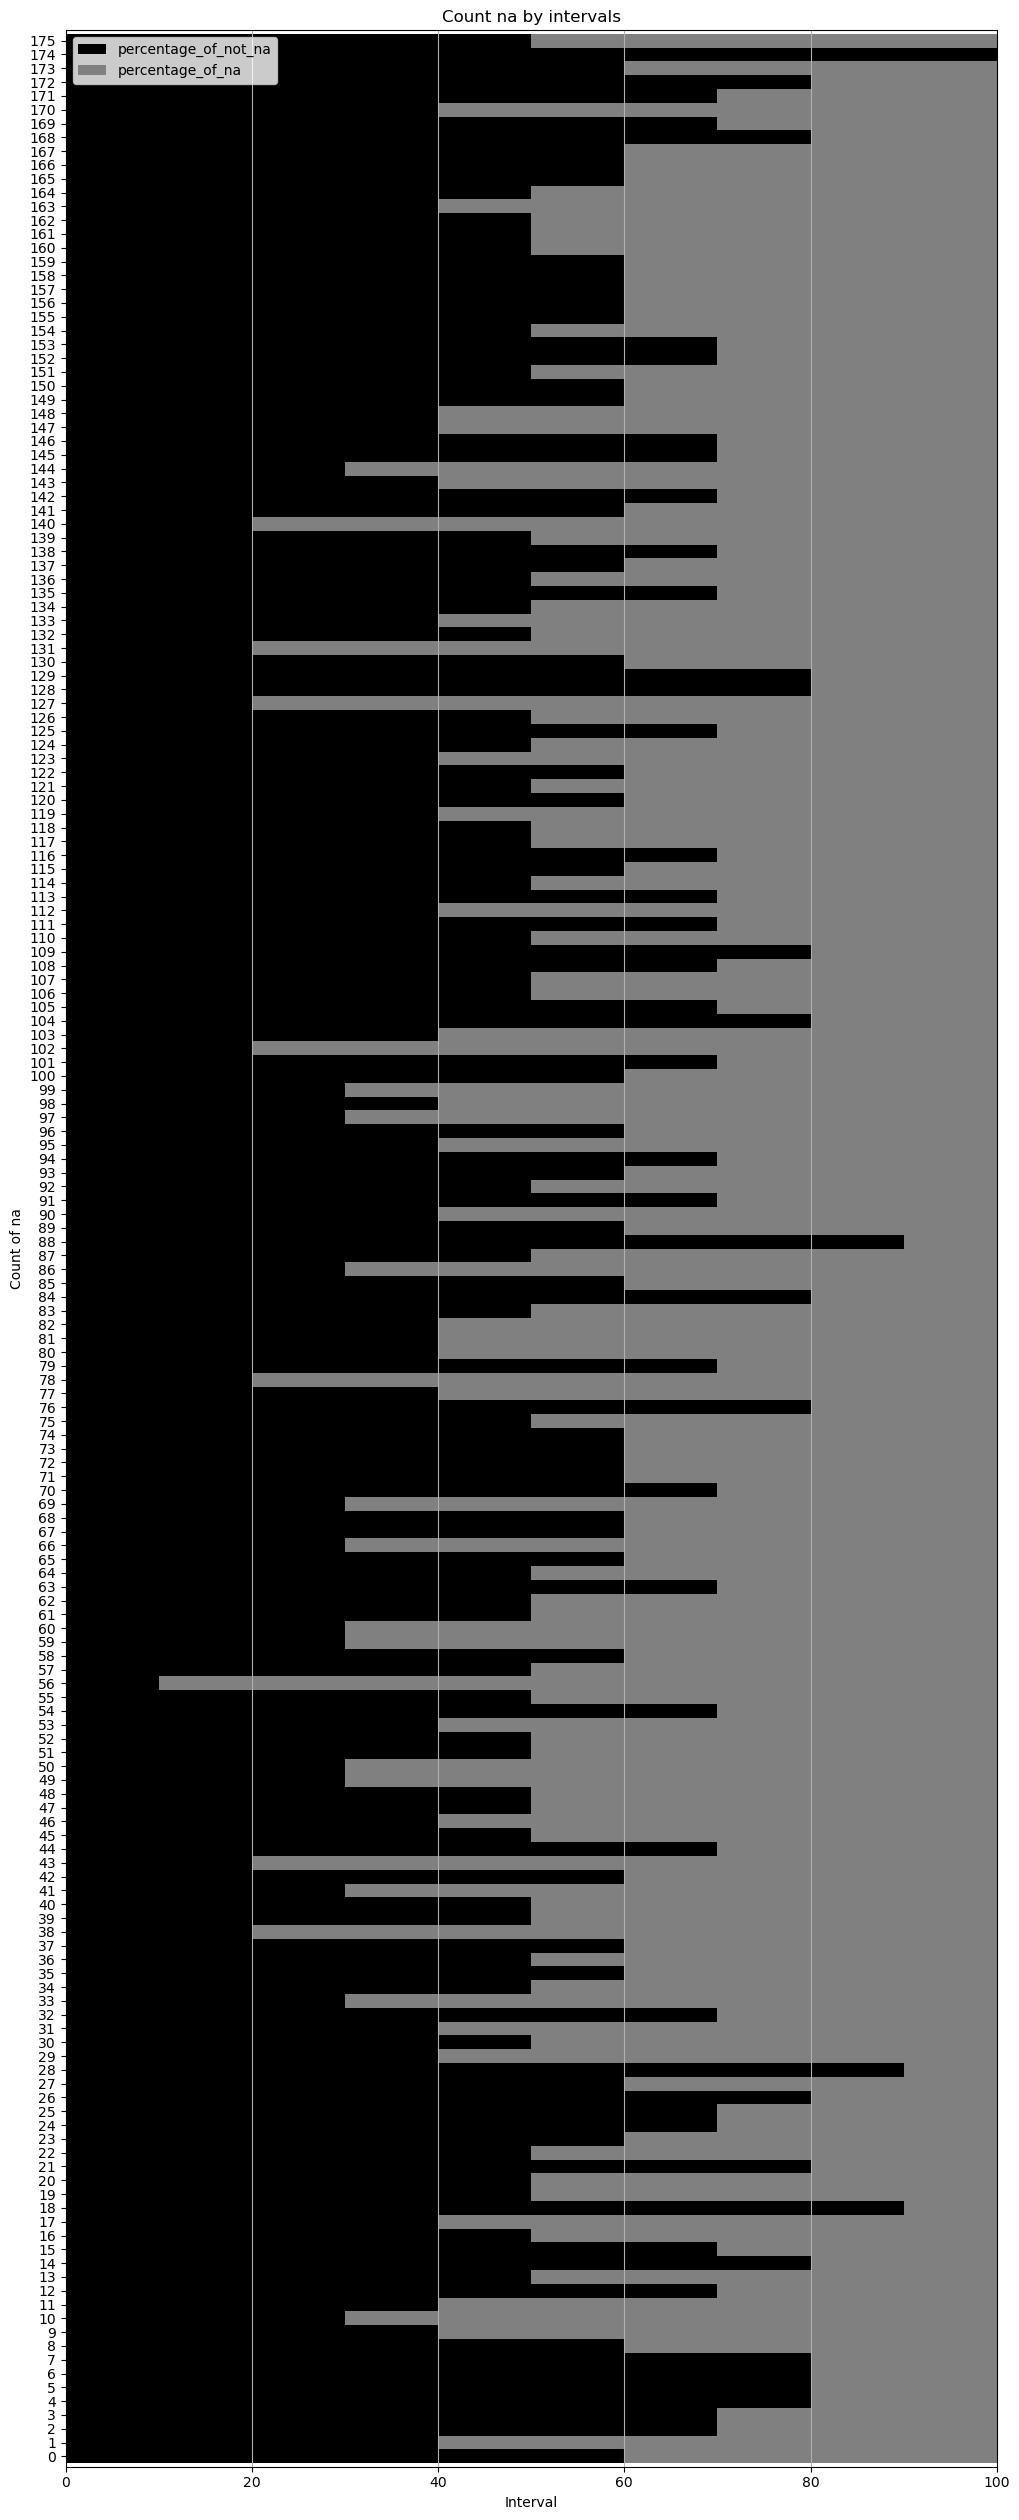

In [88]:
k_dramas.missing_data.percentage_of_not_na_vs_percentage_of_na_plot(interval, column, figsize=(10, 25))

In [89]:
k_dramas.missing_data.na_count_by_intervals(interval, column).sort_values(by="count_of_na", ascending=False)

,count_of_na,count_of_not_na,percentage_of_na,percentage_of_not_na
groupby_number,,,,
56,9,1,90.0,10.0
131,8,2,80.0,20.0
78,8,2,80.0,20.0
43,8,2,80.0,20.0
140,8,2,80.0,20.0
...,...,...,...,...
88,1,9,10.0,90.0
28,1,9,10.0,90.0
18,1,9,10.0,90.0


-----

In [90]:
bins = 30

In [91]:
k_dramas.missing_data.na_count_by_bins(bins, column)

,count_of_na,count_of_not_na,percentage_of_na,percentage_of_not_na
groupby_number,,,,
0,20,39,33.898305,66.101695
1,26,32,44.827586,55.172414
2,22,37,37.288136,62.711864
3,22,36,37.931034,62.068966
4,17,41,29.310345,70.689655
5,32,27,54.237288,45.762712
6,29,29,50.000000,50.000000
7,33,25,56.896552,43.103448
8,33,26,55.932203,44.067797


In [92]:
k_dramas.missing_data.na_count_by_bins(bins, column).sort_values(by="count_of_na", ascending=False)

,count_of_na,count_of_not_na,percentage_of_na,percentage_of_not_na
groupby_number,,,,
8,33,26,55.932203,44.067797
7,33,25,56.896552,43.103448
5,32,27,54.237288,45.762712
10,32,27,54.237288,45.762712
13,31,28,52.542373,47.457627
9,31,27,53.448276,46.551724
24,30,29,50.847458,49.152542
16,30,29,50.847458,49.152542
21,30,29,50.847458,49.152542


-----

In [93]:
k_dramas.missing_data.size_of_sections_of_na_and_not_na(column)

,num_in_section,value
0,1,na
1,2,not_na
2,1,na
3,1,not_na
4,1,na
...,...,...
820,1,na
821,1,not_na
822,2,na
823,12,not_na


In [94]:
k_dramas.missing_data.size_of_sections_of_na_and_not_na(column).sort_values(by="num_in_section", ascending=False)

,num_in_section,value
823,12,not_na
417,11,not_na
25,11,not_na
81,11,not_na
414,9,na
...,...,...
356,1,na
352,1,na
349,1,not_na
348,1,na


In [95]:
k_dramas.missing_data.size_of_sections_of_na_and_not_na(column).sort_values(by=["value", "num_in_section"], ascending=False)

,num_in_section,value
823,12,not_na
25,11,not_na
81,11,not_na
417,11,not_na
19,9,not_na
...,...,...
814,1,na
816,1,na
818,1,na
820,1,na
